In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy
from scipy.linalg import eigh
from scipy.spatial.distance import squareform, pdist

In [48]:
def rbf_kpca(X, gamma, n_components):
        """
    Aplica Kernel PCA (Análisis de Componentes Principales con Núcleo)
    utilizando un núcleo RBF (función de base radial).

    Este método proyecta los datos a un espacio de características de alta
    dimensión inducido por el núcleo RBF y realiza un PCA en dicho espacio.
    Se utiliza para capturar estructuras no lineales que el PCA estándar
    no puede detectar.

    Parámetros
    ----------
    X : ndarray de forma (n_muestras, n_features)
        Conjunto de datos de entrada. Cada fila corresponde a una muestra
        y cada columna a una característica.

    gamma : float
        Parámetro del núcleo RBF. Controla la anchura de la gaussiana:
        valores grandes de `gamma` hacen que el núcleo sea más localizado,
        mientras que valores pequeños lo hacen más global.

    n_components : int
        Número de componentes principales (dimensiones) a conservar en
        la proyección final.

    Retorna
    -------
    alphas : ndarray de forma (n_muestras, n_components)
        Matriz de proyecciones de las muestras en los primeros
        `n_components` componentes principales en el espacio del núcleo.

    lambdas : ndarray de forma (n_components,)
        Autovalores asociados a los componentes principales seleccionados.
        Indican la varianza explicada por cada componente en el espacio
        transformado.
    """
    # obtener distancias cuadradas
    sq_dist = pdist(X, "sqeuclidean")
    # convertir en matriz
    mat_sq_dist = squareform(sq_dist)
    # matriz de núcleos
    K = np.exp(-gamma * mat_sq_dist)
    # centrar la matriz
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # eigenpares
    eigenvals, eigenvecs = eigh(K)
    # invertir orden (de mayor a menor)
    eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]
    # seleccionar los primeros "k"
    alphas = eigenvecs[:, :n_components]
    lambdas = eigenvals[:n_components]
    return alphas, lambdas


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 38)

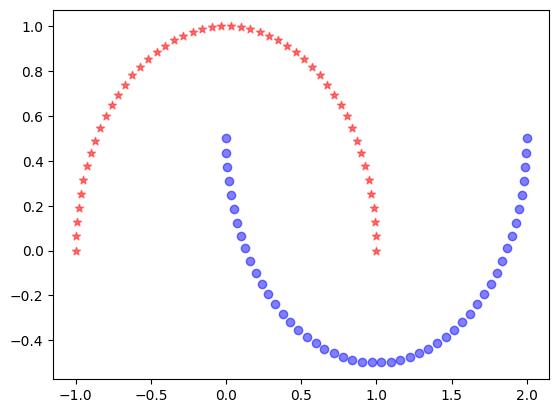

In [49]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, random_state = 42)
plt.scatter(X[y==0,0],X[y==0,1],color="red", marker="*",alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color="blue", marker="o",alpha=0.5)

In [50]:
# con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

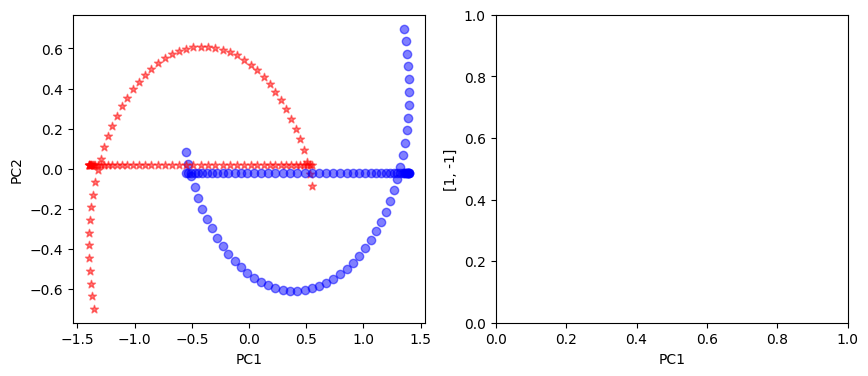

In [51]:
fig,ax = plt.subplots(nrows=1 , ncols=2, figsize=(10,4))
ax[0].scatter(X_pca[y==0,0], X_pca[y==0,1],color="red", marker="*",alpha=0.5)
ax[0].scatter(X_pca[y==1,0], X_pca[y==1,1],color="blue", marker="o",alpha=0.5)
ax[0].scatter(X_pca[y==0,0],  np.zeros((50,1))+.02 ,color="red", marker="*",alpha=0.5)
ax[0].scatter(X_pca[y==1,0],  np.zeros((50,1))-.02 ,color="blue", marker="o",alpha=0.5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel([1,-1])
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

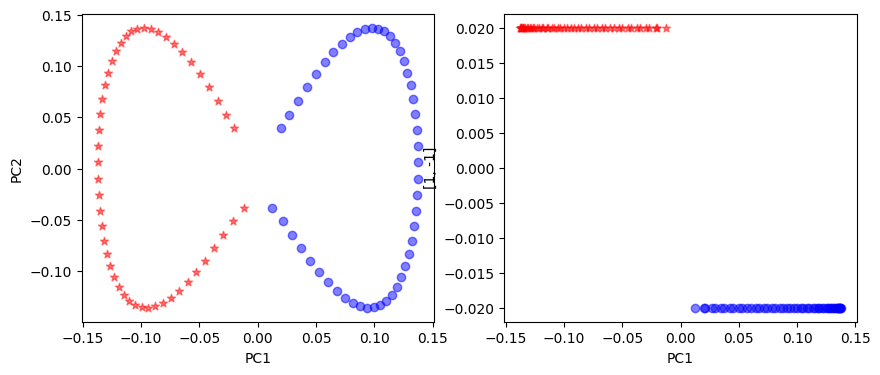

In [53]:
# rbf_kpca
X_kpca , l = rbf_kpca(X, gamma=15, n_components=2) 
fig,ax = plt.subplots(nrows=1 , ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1],color="red", marker="*",alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1],color="blue", marker="o",alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],  np.zeros((50,1))+.02 ,color="red", marker="*",alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],  np.zeros((50,1))-.02 ,color="blue", marker="o",alpha=0.5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel([1,-1])
plt.show


In [35]:
# Visualisación RBF
#parametros RBF
gamma = .1
center = (0,0)
#Función RBF
def rbf(x, y, center, gamma):
    return np.exp(-gamma * ((x-center[0]**2 + (y-center[1])**2)))
#configuración
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x,y)
Z = rbf(X, Y, center, gamma)

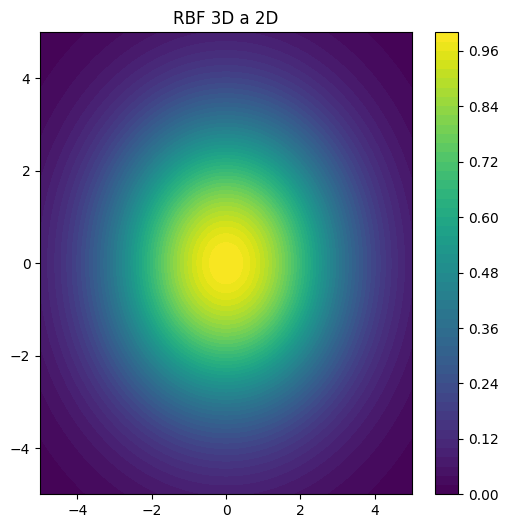

In [66]:
plt.figure(figsize=(6,6))
plt.contourf(X, Y, Z, 50, cmap="viridis")
plt.colorbar()
plt.title("RBF 3D a 2D")
plt.show()

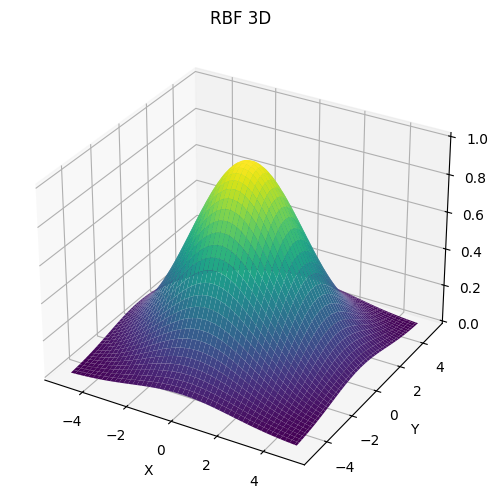

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")

ax.set_title("RBF 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()


In [60]:
# Kernel PCA de sklearn
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, random_state = 42)
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)


<function matplotlib.pyplot.show(close=None, block=None)>

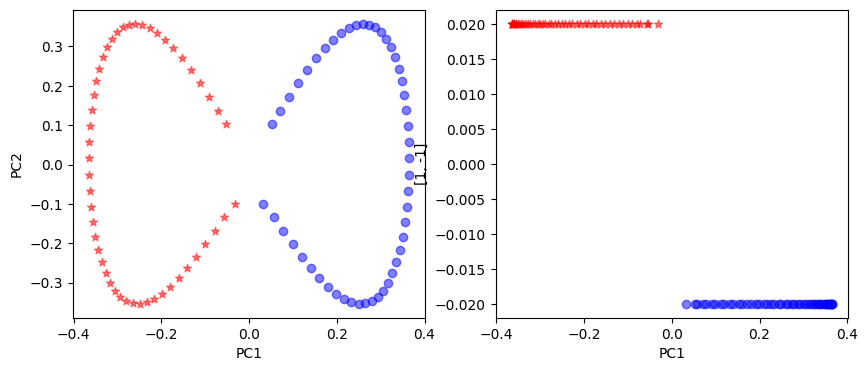

In [61]:
# rbf_kpca
X_kpca = kpca.fit_transform(X)
fig,ax = plt.subplots(nrows=1 , ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1],color="red", marker="*",alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1],color="blue", marker="o",alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],  np.zeros((50,1))+.02 ,color="red", marker="*",alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],  np.zeros((50,1))-.02 ,color="blue", marker="o",alpha=0.5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel([1,-1])
plt.show